In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('NEDL_LASSO_Elastic_Net.xlsx',index_col='Date')[['Blackrock','SP500','Treasury bonds','Gold','Oil']].dropna()
df

,Blackrock,SP500,Treasury bonds,Gold,Oil
Date,,,,,
2016-11-23,372.989990,220.699997,120.639999,113.250000,14.000000
2016-11-25,373.670013,221.520004,120.82,112.610001,13.590000
2016-11-28,368.649994,220.479996,121.709999,113.800003,13.710000
2016-11-29,368.549988,220.910004,122.220001,113.269997,13.240000
2016-11-30,370.790009,220.380005,120.239998,111.750000,14.440000
...,...,...,...,...,...
2021-11-16,948.950012,469.279999,145.110001,172.919998,21.900000
2021-11-17,931.539978,468.140015,146.259995,174.500000,21.400000
2021-11-18,922.770020,469.730011,146.809998,173.940002,21.549999


In [3]:
returns=df.pct_change().dropna()*100
returns

,Blackrock,SP500,Treasury bonds,Gold,Oil
Date,,,,,
2016-11-25,0.182317,0.371548,0.149205,-0.565121,-2.928571
2016-11-28,-1.343436,-0.469487,0.736632,1.056746,0.883002
2016-11-29,-0.027128,0.195033,0.419030,-0.465735,-3.428155
2016-11-30,0.607793,-0.239916,-1.620032,-1.341924,9.063444
2016-12-01,1.728742,-0.367546,-1.255818,-0.187919,3.947368
...,...,...,...,...,...
2021-11-16,-0.450042,0.395782,-0.254327,-0.723387,0.504814
2021-11-17,-1.834663,-0.242922,0.792498,0.913718,-2.283105
2021-11-18,-0.941447,0.339641,0.376045,-0.320916,0.700930


In [4]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=0.02)#Tune alpha for come up with least number of assets
lasso_reg.fit(returns[['SP500','Treasury bonds','Gold','Oil']],returns['Blackrock'])

Lasso(alpha=0.02)

In [5]:
lasso_reg.coef_

array([ 1.19263227, -0.16220105, -0.        , -0.02555877])

In [6]:
lasso_reg.coef_/sum(abs(lasso_reg.coef_))

array([ 0.8639808 , -0.11750361, -0.        , -0.01851559])

In [7]:
lasso_reg.intercept_/100

0.0001313561489589049

In [8]:
np.sqrt(0.000)

0.0

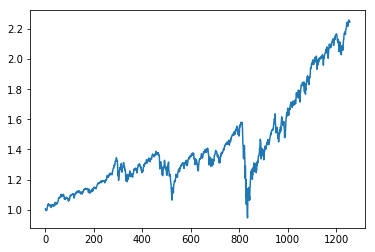

In [9]:
plt.plot((1+lasso_reg.coef_.dot(returns[['SP500','Treasury bonds','Gold','Oil']].T)/100).cumprod())

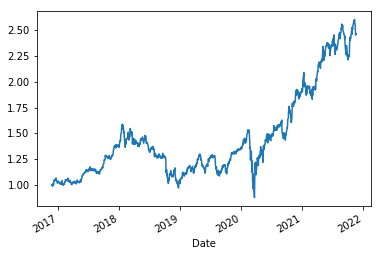

In [10]:
(1+returns['Blackrock']/100).cumprod().plot()

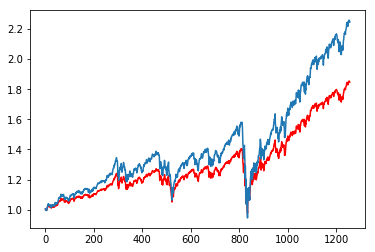

In [13]:
plt.plot((1+(lasso_reg.coef_/sum(abs(lasso_reg.coef_))).dot(returns[['SP500','Treasury bonds','Gold','Oil']].T)/100).cumprod(),color='r')
plt.plot((1+lasso_reg.coef_.dot(returns[['SP500','Treasury bonds','Gold','Oil']].T)/100).cumprod())